In [8]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [9]:
WRFDAT = xr.open_dataset('./wrfout_d01_2017-10-16.nc', engine='netcdf4')
WRFDAT

<xarray.Dataset>
Dimensions:                (Time: 25, south_north: 119, west_east: 119, bottom_top: 39, bottom_top_stag: 40, soil_layers_stag: 4, west_east_stag: 120, south_north_stag: 120, seed_dim_stag: 8)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top, bottom_top_stag, soil_layers_stag, west_east_stag, south_north_stag, seed_dim_stag
Data variables: (12/201)
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 ...
    PC                     (Time, south_north, west_east) float32 ...
    LANDMASK               (Time, south_north, west_east) float32 ...
    LAKEMASK               (Time, south_north, west_east) float32 ...
    SST                    (Time, south_north, west_east) float32 ...
    SST_INPUT              (Time, south_north, west_east) float32 ...
Attributes: (12/129)
    TITLE:                            OUTPUT FROM WRF V4.1.4 MODEL
    START_DATE:                      2017-10-16_00:00:00
    SIMULATION_START_DATE:           2017-10-16_00:00:00
    WEST-EAST_GRID_DIMENSION:        120
    SOUTH-NORTH_GRID_DIMENSION:      120
    BOTTOM-TOP_GRID_DIMENSION:       40
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [10]:
LONS = WRFDAT.XLONG[0,:,:].squeeze()
LATS = WRFDAT.XLAT[0,:,:].squeeze()
LSM = WRFDAT.LANDMASK[0,:,:].squeeze()
Z = WRFDAT.HGT[0,:,:].squeeze()
times = ['16 Oct 00:00','16 Oct 03:00','16 Oct 06:00','16 Oct 09:00','16 Oct 12:00','16 Oct 15:00','16 Oct 18:00','16 Oct 21:00','17 Oct 00:00',]

plotting

In [11]:
t1 = 3

U10 = WRFDAT.U10[t1,:,:].squeeze()
V10 = WRFDAT.V10[t1,:,:].squeeze()
t2m = WRFDAT.T2[t1,:,:].squeeze() - 273.15
surfp = WRFDAT.PSFC[t1,:,:].squeeze()

In [12]:
print(LATS.values.min())
print(LATS.values.max())

49.46818
59.28232


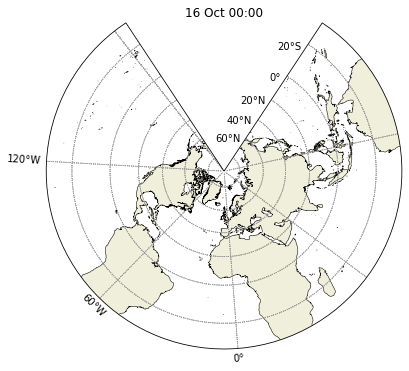

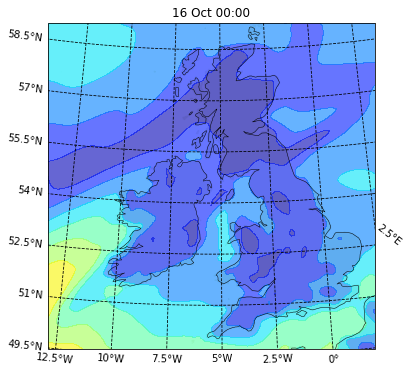

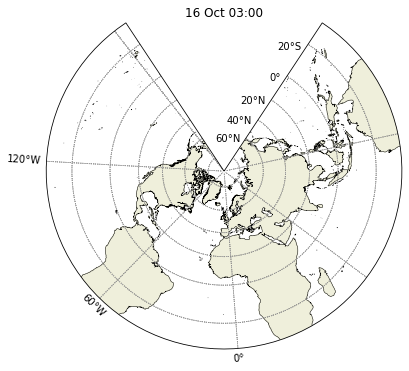

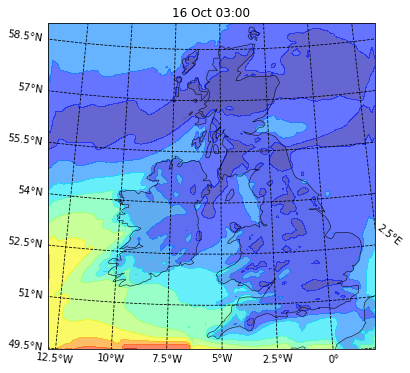

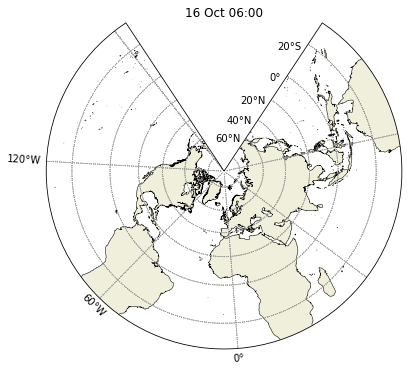

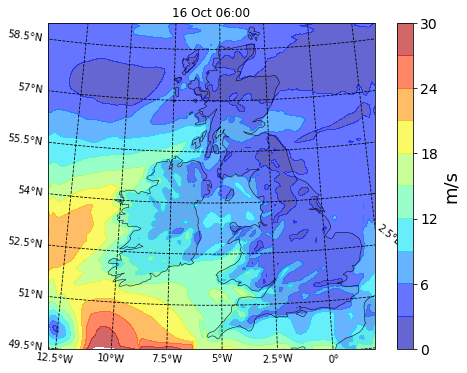

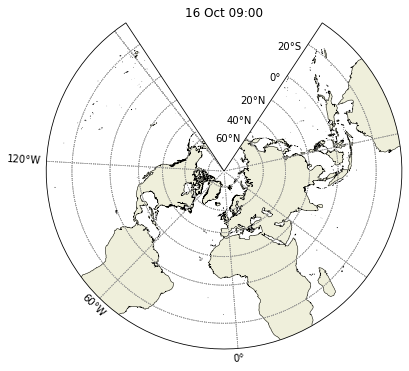

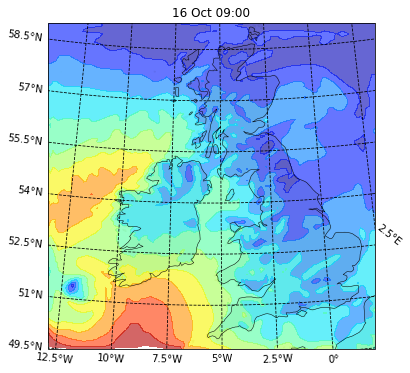

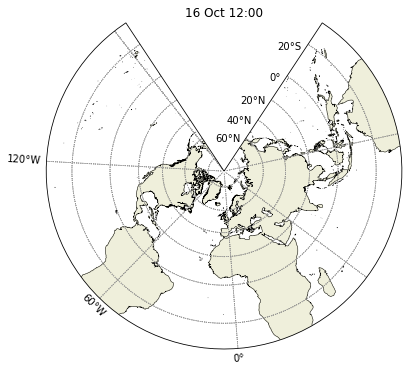

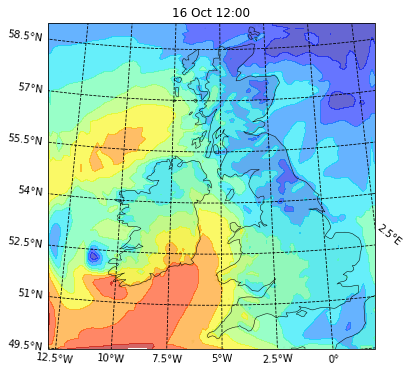

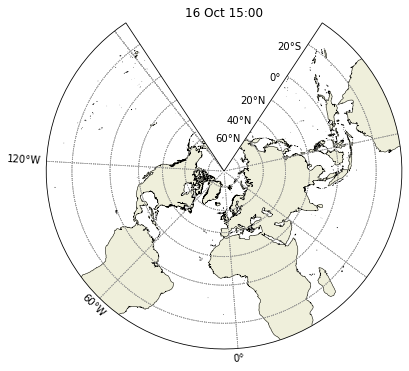

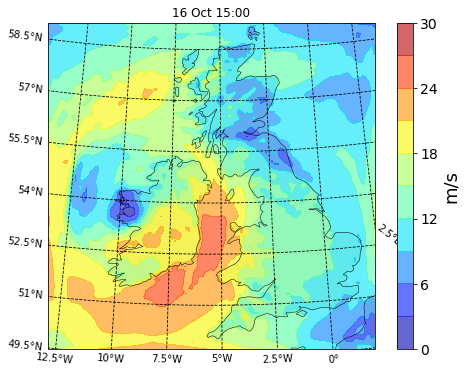

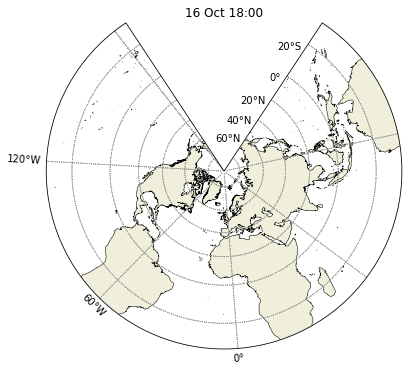

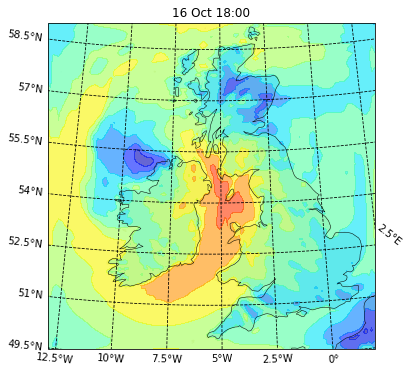

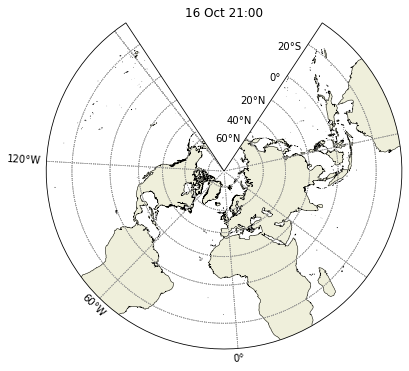

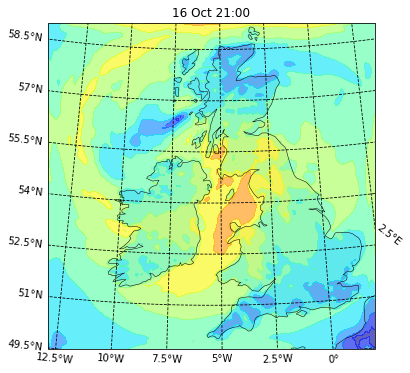

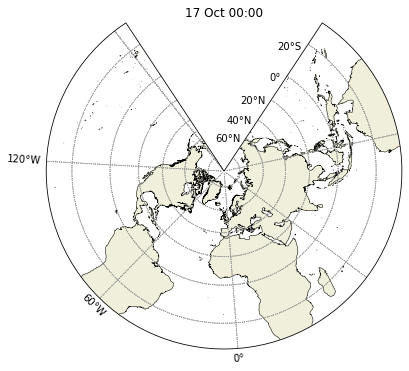

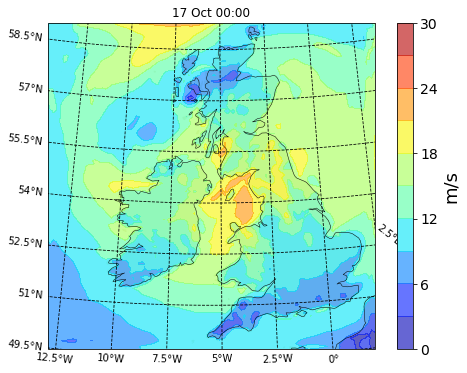

In [18]:
for t in range(0,27,3):
    U10 = WRFDAT.U10[t,:,:].squeeze()
    V10 = WRFDAT.V10[t,:,:].squeeze()
    surfp = WRFDAT.PSFC[t,:,:].squeeze()
    
    figA = plt.figure(figsize=[8,6])
    axA = plt.axes(projection=ccrs.LambertConformal(central_longitude=-5.5,central_latitude=54.5,
                                                    standard_parallels=(LATS.values.min(),
                                                                        LATS.values.max())))
    
    axA.coastlines(resolution='50m', color='black', linewidth=0.5)

    #axA.set_extent([LONS.min(), LONS.max(), LATS.min(), LATS.max()],
    #          crs=ccrs.PlateCarree())

    axA.quiver(LONS.values, LATS.values, U10.values, V10.values,
          transform=ccrs.PlateCarree(), regrid_shape=25)

    axA.add_feature(cfeature.LAND)
    axA.gridlines(color="black", linestyle="dotted")

    grd = axA.gridlines(draw_labels=True, linestyle='--',x_inline=False,y_inline=False)
    grd.top_labels = False
    grd.right_labels= False
    plt.title(times[int(t/3)])
    
    #
    figB = plt.figure(figsize=[8,6])
    axB = plt.axes(projection=ccrs.LambertConformal(central_longitude=-5.5,central_latitude=54.5,
                                                    standard_parallels=(LATS.values.min(),
                                                                        LATS.values.max())))

    axB.coastlines(resolution='50m', color='black', linewidth=0.5)

    #axB.set_extent([LONS.min(), LONS.max(), LATS.min(), LATS.max()],
    #          crs=ccrs.PlateCarree())

    clevs = np.arange(0,33,3)

    my_cf = plt.contourf(LONS.values, LATS.values, np.sqrt(U10**2+V10**2),levels=clevs,
            transform=ccrs.PlateCarree(),cmap="jet",alpha=0.6)
    if t == 6 or t == 15 or t == 24:
        cbar = plt.colorbar(orientation='vertical')
        cbar.ax.tick_params(labelsize=14)
        cbar.set_label('m/s',size=18)

    axB.add_feature(cfeature.LAND)
    grd = axB.gridlines(color="black", draw_labels=True, linestyle='--',x_inline=False,y_inline=False)
    grd.top_labels = False
    grd.right_labels = False
    #grd.xlabels_bottom = True
    #grd.xformatter = LONGITUDE_FORMATTER
    plt.title(times[int(t/3)])

extracting data

In [ ]:
CORKLAT = 51.85
CORKLON = -8.49

Z2 = (LONS-CORKLON)**2 + (LATS-CORKLAT)**2

qwe = Z2.argmin(dim=(["south_north","west_east"]))
#qwe

i = qwe[Z2.dims[0]]
j = qwe[Z2.dims[1]]
print(i)
print('\n')
print(j)

In [ ]:
    U10 = WRFDAT.U10[:,:,:].squeeze()
    V10 = WRFDAT.V10[:,:,:].squeeze()
    SPEED = np.sqrt(U10**2+V10**2)
    CORKWIND = SPEED[:,i,j]
    CORKWIND.plot()

In [ ]:
CORKWIND[168:-1]

In [ ]:
np.savetxt('sevenday.txt', CORKWIND[168:-1], delimiter=',')

In [ ]:
WRFDAT.HGT[:,i,j]